In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import collections
import sklearn
import pickle
from sklearn.base import BaseEstimator, ClassifierMixin

# Подготовка датасета

In [249]:
data = pd.read_csv('Titanic-Dataset.csv')

In [250]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Убираем ненужные данные

In [251]:
data = data.drop (["PassengerId", "Name", "Ticket"], axis = 1)

Вытаскиваем ответы

In [252]:
label = data ["Survived"]
data = data.drop (["Survived"], axis = 1)

Проверяем, есть ли незаполненные данные или данные с неподходящим типом

In [253]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Дозаполняем данные о возрасте

In [254]:
data ["Age"] = data ["Age"].fillna (data ["Age"].median ())

Смотрим на самые частовстречающиеся значения столбца "Embarked".

In [255]:
data ["Embarked"].value_counts ()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Это "S". Заполняем пропуски этим значением.

In [256]:
data ["Embarked"] = data ["Embarked"].fillna ("S")

Стобец "Cabin" состоит из уникальных данных. Кроме того, большая часть данных отсутствует. Пытаться заполнить его не имеет смысла, поэтому просто удаляем.

In [257]:
data ["Cabin"].value_counts ()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [258]:
data = data.drop (["Cabin"], axis = 1)

Бинаризируем графы "Sex" и "Embarked".

In [259]:
data ["Sex"] = data ["Sex"].astype ("category")
data ["Sex"] = data ["Sex"].cat.codes

In [260]:
data = pd.get_dummies (data, columns = ["Embarked"])

In [261]:
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
5,3,1,28.0,0,0,8.4583,0,1,0
6,1,1,54.0,0,0,51.8625,0,0,1
7,3,1,2.0,3,1,21.0750,0,0,1
8,3,0,27.0,0,2,11.1333,0,0,1
9,2,0,14.0,1,0,30.0708,1,0,0


In [262]:
data.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224
Age,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729
SibSp,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
Embarked_C,-0.243292,-0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Embarked_Q,0.221009,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
Embarked_S,0.074053,0.119224,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000


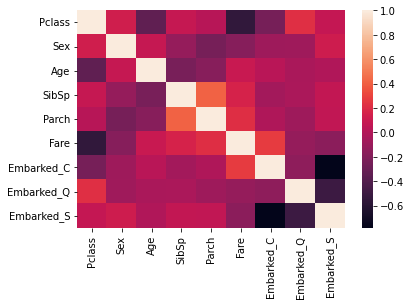

In [263]:
sns.heatmap(data.corr())

In [264]:
data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


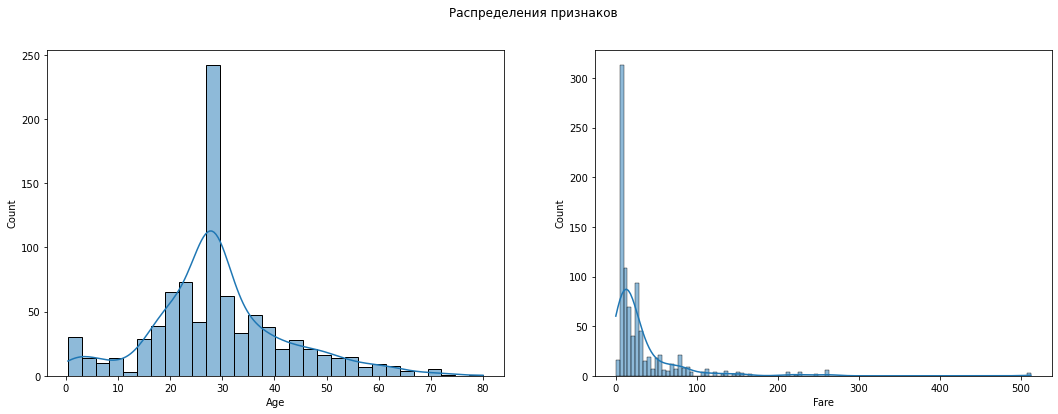

In [265]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Age'], ax = ax[0], kde = True)
sns.histplot(data['Fare'], ax = ax[1], kde = True)
None

Разбиваем данные на обучающую и тестовую выборки

In [266]:
from sklearn.model_selection import train_test_split
train_data, val_data, train_label, val_label = train_test_split (data.to_numpy(), label.to_numpy(), test_size = 0.2, random_state = 10)

# KNN

In [267]:
class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k
        
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        
    def euclidean_distance(self, row1, row2):
        distance = 0
        for i in range(len(row1)): 
            distance += (row1[i] - row2[i]) ** 2
        return math.sqrt(distance)
        
    def predict(self, maindata):
        res = np.ndarray((maindata.shape[0],))
        for j, data in enumerate(maindata):
            distances = []
            for i, row in enumerate(self.data):
                distances.append((self.euclidean_distance(data, row), self.labels[i]))
            distances.sort(key = lambda tup: tup[0])
            dictionary = collections.defaultdict(int)
            for i in range(self.k):
                dictionary[distances[i][1]] += 1
            res[j] = max(dictionary.items(), key = lambda tup: tup[1])[0]
        return res

In [268]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import RocCurveDisplay

knn = Pipeline(steps = [('knn', KNN(4))])
print(knn.get_params())

{'memory': None, 'steps': [('knn', KNN(k=4))], 'verbose': False, 'knn': KNN(k=4), 'knn__k': 4}


In [269]:
def Print_scores(val_label, val_data_predict):
    print(f"Accuracy tests: {accuracy_score(val_label, val_data_predict)}")
    matrix = confusion_matrix(val_label, val_data_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
    disp.plot()
    plt.show()
    print(f"Precision tests: {precision_score(val_label, val_data_predict)}")
    print(f"Recall tests: {recall_score(val_label, val_data_predict)}")
    RocCurveDisplay.from_predictions(val_label, val_data_predict)
    plt.show()

In [270]:
test = np.arange (1, 25, 1)

{'knn__k': 4}
Accuracy train: 0.7176499556781247
Accuracy tests: 0.6815642458100558


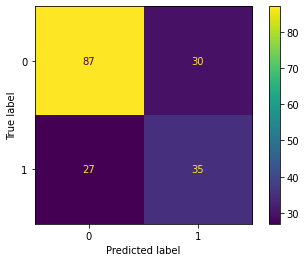

Precision tests: 0.5384615384615384
Recall tests: 0.5645161290322581


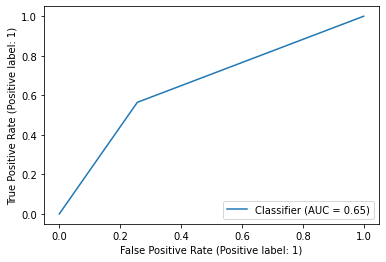

In [271]:
gcv = GridSearchCV(estimator = knn, param_grid={'knn__k': test})
gcv.fit(train_data, train_label)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
predicted = gcv.best_estimator_.predict(val_data)
Print_scores(val_label, predicted)

{'knn__k': 3}
Accuracy train: 0.7064118979611937
Accuracy tests: 0.7039106145251397


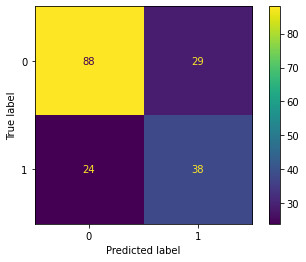

Precision tests: 0.5671641791044776
Recall tests: 0.6129032258064516


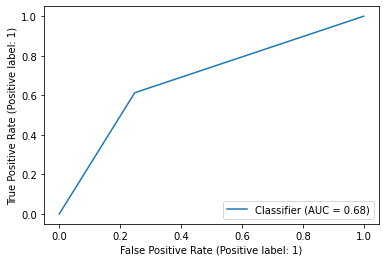

In [272]:
rcv = RandomizedSearchCV(estimator = knn, param_distributions={'knn__k': test})
rcv.fit(train_data, train_label)
print(rcv.best_params_)
print(f"Accuracy train: {rcv.best_score_}")
predicted = rcv.best_estimator_.predict(val_data)
Print_scores(val_label, predicted)

In [273]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps = [('knn', KNeighborsClassifier(4))])
print(knn.get_params())

{'memory': None, 'steps': [('knn', KNeighborsClassifier(n_neighbors=4))], 'verbose': False, 'knn': KNeighborsClassifier(n_neighbors=4), 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 4, 'knn__p': 2, 'knn__weights': 'uniform'}


{'knn__n_neighbors': 3}
Accuracy train: 0.7078104993597951
Accuracy tests: 0.7094972067039106


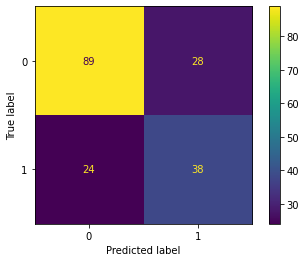

Precision tests: 0.5757575757575758
Recall tests: 0.6129032258064516


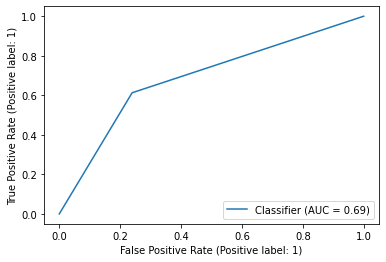

In [274]:
gcv = GridSearchCV(estimator = knn, param_grid={'knn__n_neighbors': test})
gcv.fit(train_data, train_label)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
predicted = gcv.best_estimator_.predict(val_data)
Print_scores(val_label, predicted)

# Naive Bayes

In [275]:
from sklearn.base import BaseEstimator, ClassifierMixin

class NaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, bins):
        self.bins = bins
        pass
    
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        self.classes = []
        for j in np.unique(labels):
            
            self.classes.append([])
            for i in range (data.shape[1]):
                self.classes[j].append([*np.histogram(data[labels == j, i], bins = self.bins)])
                self.classes[j][-1][0] = self.classes[j][-1][0].astype('float64') / len(data[labels == j, i])
        
        self.prclasses = np.unique(labels, return_counts = True)[1] / len(labels)
        
    def predict(self, maindata):
        res = np.ndarray((maindata.shape[0],))
        for j, data in enumerate(maindata):
            maximum = 0
            ans = 0
            for i in range(len(self.classes)):
                p = self.prclasses[i]
                for k in range(len(self.classes[i])):
                    ind = np.digitize(data[k], self.classes[i][k][1])
                    
                    if ind >= len(self.classes[i][k][1]) or ind <= 0:
                        p = 0
                    else:
                        p *= self.classes[i][k][0][ind - 1]
                    
                if p > maximum:
                    maximum = p
                    ans = i
            res[j] = ans
        return res  

In [276]:
bn = Pipeline(steps = [('normalizer', Normalizer()), ('bn', NaiveBayes(10))])
bn.get_params()

{'memory': None,
 'steps': [('normalizer', Normalizer()), ('bn', NaiveBayes(bins=10))],
 'verbose': False,
 'normalizer': Normalizer(),
 'bn': NaiveBayes(bins=10),
 'normalizer__copy': True,
 'normalizer__norm': 'l2',
 'bn__bins': 10}

{'bn__bins': 9}
Accuracy train: 0.7022160937653895
Accuracy tests: 0.7318435754189944


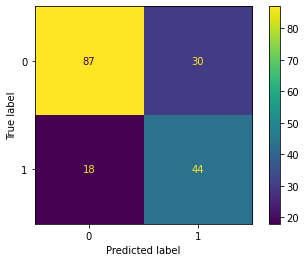

Precision tests: 0.5945945945945946
Recall tests: 0.7096774193548387


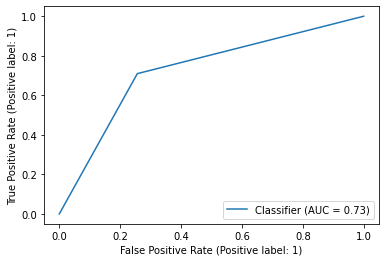

In [277]:
test = np.arange (2, 100, 1)

gcv = GridSearchCV(estimator = bn, param_grid={'bn__bins': test})
gcv.fit(train_data, train_label)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
predicted = gcv.best_estimator_.predict(val_data)
Print_scores(val_label, predicted)

In [278]:
from sklearn.base import BaseEstimator, ClassifierMixin

class GaussianNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass
    
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        self.mathexp = []
        self.variance = []
        self.classes = []
        
        for j in np.unique(labels):
            self.classes.append(j)
            self.mathexp.append(data[labels == j,].mean(axis = 0))
            self.variance.append(data[labels == j,].var(axis = 0))
        
    def predict(self, maindata):
        res = np.ndarray((maindata.shape[0],))
        for j, data in enumerate(maindata):
            maximum = 0
            ans = 0
            for i in range(len(self.classes)):
                t = np.exp((-1/2) * ((data - self.mathexp[i]) ** 2) / (2 * self.variance[i])) / np.sqrt(2 * np.pi *  self.variance[i])
                t = np.cumprod(t) 
                if t[-1] > maximum:
                    maximum = t[-1]
                    ans = self.classes[i]
            res[j] = ans
        return res  

Accuracy tests: 0.776536312849162


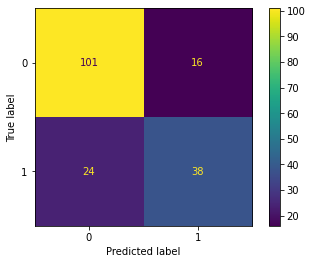

Precision tests: 0.7037037037037037
Recall tests: 0.6129032258064516


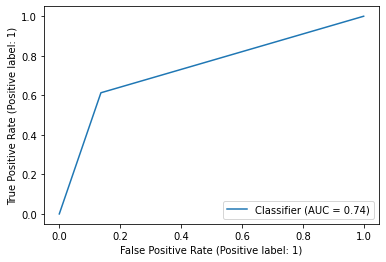

In [279]:
bn = Pipeline(steps = [('normalizer', Normalizer()), ('bn', GaussianNaiveBayes())])
bn.fit(train_data, train_label)
predicted = bn.predict(val_data)
Print_scores(val_label, predicted)

In [280]:
with open('best_bayes.pickle', 'wb') as f:
    pickle.dump(bn, f, pickle.HIGHEST_PROTOCOL)

Accuracy tests: 0.7653631284916201


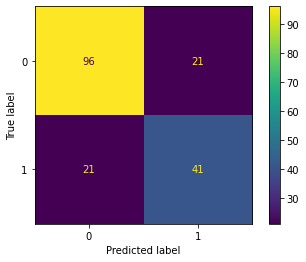

Precision tests: 0.6612903225806451
Recall tests: 0.6612903225806451


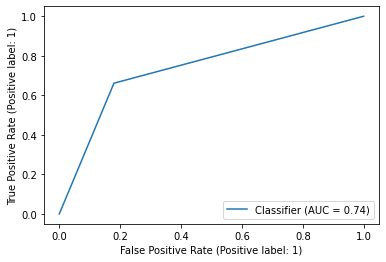

In [281]:
from sklearn.naive_bayes import GaussianNB

bn = Pipeline(steps = [('normalizer', Normalizer()),('bn', GaussianNB())])
bn.fit(train_data, train_label)
predicted = bn.predict(val_data)
Print_scores(val_label, predicted)

# Линейная/логистическая регрессиия

In [282]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Linear(BaseEstimator, ClassifierMixin):
    def __init__(self, lr, nepoch, batch_size):
        self.lr = lr
        self.nepoch = nepoch
        self.batch_size = batch_size
        pass
    
    def sigmoid(self, x):
        self.l = 1 / (1 + np.exp(-x))
        return self.l
        
    def fit(self, data, labels):
        data = np.concatenate((data, np.ones((data.shape[0],1))), axis = 1)
        self.W = np.random.normal(0, 1, (len(data[0]),))
        
        for i in range(self.nepoch):
            for i in range(0, len(data), self.batch_size):
                xb = data[i:i + self.batch_size]
                yb = labels[i:i + self.batch_size]
                p = np.dot(self.W, xb.T)
                s = self.sigmoid(p)
                dp = np.dot(xb.T, (s - yb).T)
                self.W -= self.lr * dp
        
    def predict(self, maindata):
        maindata = np.concatenate((maindata, np.ones((maindata.shape[0],1))), axis = 1)
        p = np.dot(self.W, maindata.T)
        s = self.sigmoid(p)
        return (s > 0.5).astype('int64')

In [283]:
import sklearn
from sklearn.preprocessing import Normalizer

lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', Linear(0.1, 10, 5))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', Linear(batch_size=5, lr=0.1, nepoch=10))], 'verbose': False, 'normalizer': Normalizer(), 'lin': Linear(batch_size=5, lr=0.1, nepoch=10), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__batch_size': 5, 'lin__lr': 0.1, 'lin__nepoch': 10}


{'lin__batch_size': 10, 'lin__lr': 0.1, 'lin__nepoch': 20}
Accuracy train: 0.6783315276273023
Accuracy tests: 0.776536312849162


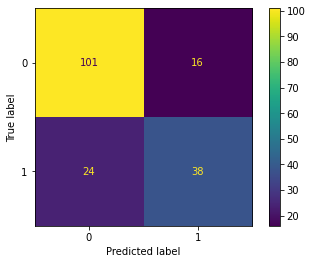

Precision tests: 0.7037037037037037
Recall tests: 0.6129032258064516


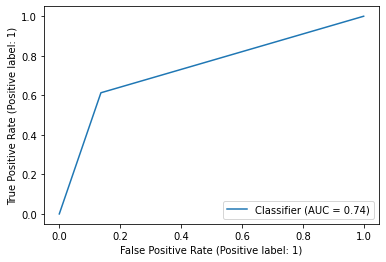

In [284]:
gcv = GridSearchCV(estimator = lin, param_grid={'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
gcv.fit(train_data, train_label)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
predicted = gcv.best_estimator_.predict(val_data)
Print_scores(val_label, predicted)

{'lin__nepoch': 10, 'lin__lr': 0.1, 'lin__batch_size': 10}
Accuracy train: 0.67835122623855
Accuracy tests: 0.770949720670391


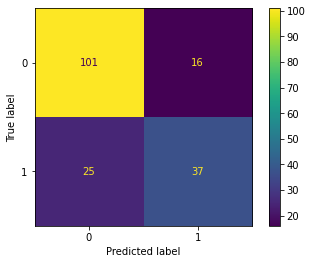

Precision tests: 0.6981132075471698
Recall tests: 0.5967741935483871


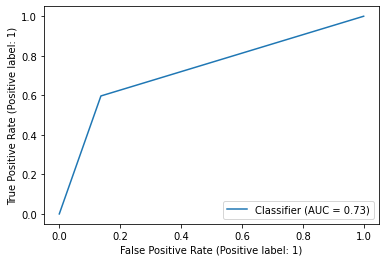

In [285]:
rcv = RandomizedSearchCV(estimator = lin, param_distributions={'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
rcv.fit(train_data, train_label)
print(rcv.best_params_)
print(f"Accuracy train: {rcv.best_score_}")
predicted = rcv.best_estimator_.predict(val_data)
Print_scores(val_label, predicted)

In [286]:
from sklearn.linear_model import SGDClassifier

lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', SGDClassifier(loss = 'log'))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', SGDClassifier(loss='log'))], 'verbose': False, 'normalizer': Normalizer(), 'lin': SGDClassifier(loss='log'), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__alpha': 0.0001, 'lin__average': False, 'lin__class_weight': None, 'lin__early_stopping': False, 'lin__epsilon': 0.1, 'lin__eta0': 0.0, 'lin__fit_intercept': True, 'lin__l1_ratio': 0.15, 'lin__learning_rate': 'optimal', 'lin__loss': 'log', 'lin__max_iter': 1000, 'lin__n_iter_no_change': 5, 'lin__n_jobs': None, 'lin__penalty': 'l2', 'lin__power_t': 0.5, 'lin__random_state': None, 'lin__shuffle': True, 'lin__tol': 0.001, 'lin__validation_fraction': 0.1, 'lin__verbose': 0, 'lin__warm_start': False}


{'lin__alpha': 0.0001, 'lin__max_iter': 100}
Accuracy train: 0.6994090416625628
Accuracy tests: 0.7541899441340782


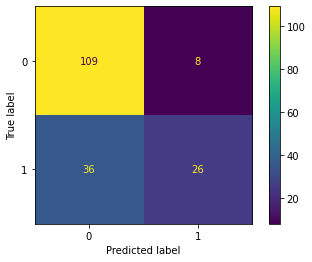

Precision tests: 0.7647058823529411
Recall tests: 0.41935483870967744


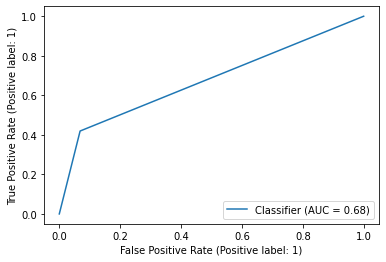

In [287]:
gcv = GridSearchCV(estimator = lin, param_grid={'lin__max_iter': [100, 1000, 1500], 'lin__alpha': [0.1, 0.001, 0.0001]})
gcv.fit(train_data, train_label)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
predicted = gcv.best_estimator_.predict(val_data)
Print_scores(val_label, predicted)

# SVM

In [288]:
val_label[val_label == 0] = -1
train_label[train_label == 0] = -1

In [289]:
from sklearn.base import BaseEstimator, ClassifierMixin
class SVM(BaseEstimator, ClassifierMixin):
    def __init__(self, lr, lambd,  batch_size, nepoch):
        self.nepoch = nepoch
        self.lr = lr
        self.lambd = lambd
        self.batch_size = batch_size
        
    def fit(self, data, labels):
        data = np.concatenate((data, np.ones((data.shape[0],1))), axis=1)
        self.W = np.random.normal(0, 1, (len(data[0]),))
        
        for i in range(self.nepoch):
            for i in range(0, len(data), self.batch_size):
                xb = data[i:i + self.batch_size]
                yb = labels[i:i + self.batch_size]
                
                p = np.dot(self.W, xb.T)

                sums = np.zeros_like(self.W)
                for i in range(len(p)):
                    if 1 - p[i] * yb[i] > 0:
                        sums -= xb[i] * yb[i]

                dp = 2 * self.lambd * self.W + sums
                self.W -= self.lr * dp
                
                
    def predict(self, maindata):
        maindata = np.concatenate((maindata, np.ones((maindata.shape[0],1))), axis=1)
        p = np.dot(self.W, maindata.T)
        return np.sign(p)

In [290]:
lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', SVM(0.03, 0.00001, 10, 10))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', SVM(batch_size=10, lambd=1e-05, lr=0.03, nepoch=10))], 'verbose': False, 'normalizer': Normalizer(), 'lin': SVM(batch_size=10, lambd=1e-05, lr=0.03, nepoch=10), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__batch_size': 10, 'lin__lambd': 1e-05, 'lin__lr': 0.03, 'lin__nepoch': 10}


{'lin__batch_size': 1, 'lin__lambd': 0.001, 'lin__lr': 0.1, 'lin__nepoch': 10}
Accuracy train: 0.6783610755441741
Accuracy tests: 0.7821229050279329


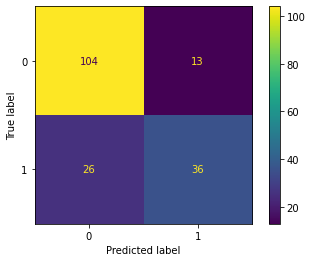

Precision tests: 0.7346938775510204
Recall tests: 0.5806451612903226


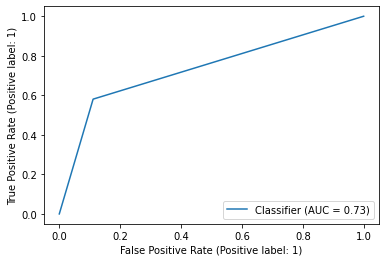

In [291]:
gcv = GridSearchCV(estimator = lin, param_grid={'lin__lambd': [0, 0.00001, 0.001, 0.1], 'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
gcv.fit(train_data, train_label)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
predicted = gcv.best_estimator_.predict(val_data)
Print_scores(val_label, predicted)

{'lin__nepoch': 1, 'lin__lr': 0.1, 'lin__lambd': 1e-05, 'lin__batch_size': 5}
Accuracy train: 0.6713286713286714
Accuracy tests: 0.7541899441340782


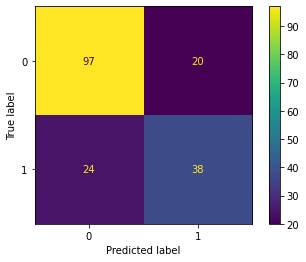

Precision tests: 0.6551724137931034
Recall tests: 0.6129032258064516


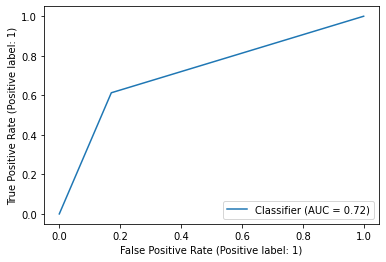

In [292]:
rcv = RandomizedSearchCV(estimator = lin, param_distributions={'lin__lambd': [0, 0.00001, 0.001, 0.1], 'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
rcv.fit(train_data, train_label)
print(rcv.best_params_)
print(f"Accuracy train: {rcv.best_score_}")
predicted = rcv.best_estimator_.predict(val_data)
Print_scores(val_label, predicted)

In [293]:
lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', SGDClassifier(loss = 'hinge'))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', SGDClassifier())], 'verbose': False, 'normalizer': Normalizer(), 'lin': SGDClassifier(), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__alpha': 0.0001, 'lin__average': False, 'lin__class_weight': None, 'lin__early_stopping': False, 'lin__epsilon': 0.1, 'lin__eta0': 0.0, 'lin__fit_intercept': True, 'lin__l1_ratio': 0.15, 'lin__learning_rate': 'optimal', 'lin__loss': 'hinge', 'lin__max_iter': 1000, 'lin__n_iter_no_change': 5, 'lin__n_jobs': None, 'lin__penalty': 'l2', 'lin__power_t': 0.5, 'lin__random_state': None, 'lin__shuffle': True, 'lin__tol': 0.001, 'lin__validation_fraction': 0.1, 'lin__verbose': 0, 'lin__warm_start': False}


{'lin__alpha': 0.0001, 'lin__max_iter': 1000}
Accuracy train: 0.7134147542598246
Accuracy tests: 0.7932960893854749


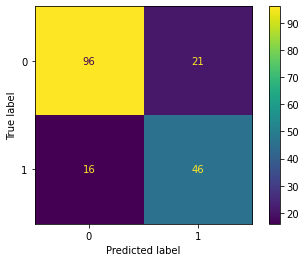

Precision tests: 0.6865671641791045
Recall tests: 0.7419354838709677


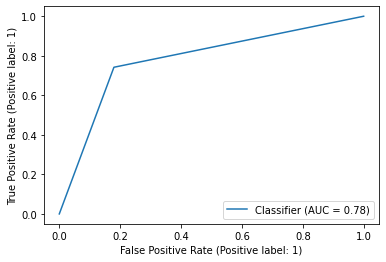

In [294]:
gcv = GridSearchCV(estimator = lin, param_grid={'lin__max_iter': [100, 1000, 1500], 'lin__alpha': [0.1, 0.001, 0.0001]})
gcv.fit(train_data, train_label)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
predicted = gcv.best_estimator_.predict(val_data)
Print_scores(val_label, predicted)

# Загрузка моделей.

In [295]:
with open('best_knn.pickle', 'wb') as f:
    pickle.dump(gcv.best_estimator_, f, pickle.HIGHEST_PROTOCOL)

with open('best_bayes.pickle', 'wb') as f:
    pickle.dump(bn, f, pickle.HIGHEST_PROTOCOL)

with open('best_linear.pickle', 'wb') as f:
    pickle.dump(gcv.best_estimator_, f, pickle.HIGHEST_PROTOCOL)

with open('best_svm.pickle', 'wb') as f:
    pickle.dump(gcv.best_estimator_, f, pickle.HIGHEST_PROTOCOL)

